<a href="https://www.kaggle.com/code/deepakbaiju/bitcoin-price-prediction?scriptVersionId=132216323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')
df=pd.read_csv("/kaggle/input/bitcoin-price-prediction/BTC-USD.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-16,6640.454102,7134.450684,6555.504395,7116.804199,7116.804199,4.678324e+10
1,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-18,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10
3,2020-04-19,7260.922363,7280.521973,7167.054688,7189.424805,7189.424805,3.131121e+10
4,2020-04-20,7186.873535,7240.290527,6835.502930,6881.958496,6881.958496,3.774711e+10
...,...,...,...,...,...,...,...
361,2021-04-12,60175.945313,61253.035156,59589.875000,59893.453125,59893.453125,5.182869e+10
362,2021-04-13,59890.019531,63742.285156,59869.957031,63503.457031,63503.457031,6.998345e+10
363,2021-04-14,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,7.745178e+10
364,2021-04-15,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10


# EDA

In [2]:
df.shape

(366, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       362 non-null    float64
 2   High       362 non-null    float64
 3   Low        362 non-null    float64
 4   Close      362 non-null    float64
 5   Adj Close  362 non-null    float64
 6   Volume     362 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [4]:
df.size

2562

In [5]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
df['month']=pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,month,year
0,2020-04-16,6640.454102,7134.450684,6555.504395,7116.804199,7116.804199,4.678324e+10,4,2020
1,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,4,2020
2,2020-04-18,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10,4,2020
3,2020-04-19,7260.922363,7280.521973,7167.054688,7189.424805,7189.424805,3.131121e+10,4,2020
4,2020-04-20,7186.873535,7240.290527,6835.502930,6881.958496,6881.958496,3.774711e+10,4,2020
...,...,...,...,...,...,...,...,...,...
361,2021-04-12,60175.945313,61253.035156,59589.875000,59893.453125,59893.453125,5.182869e+10,4,2021
362,2021-04-13,59890.019531,63742.285156,59869.957031,63503.457031,63503.457031,6.998345e+10,4,2021
363,2021-04-14,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,7.745178e+10,4,2021
364,2021-04-15,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10,4,2021


In [8]:
data=df.drop('Date',axis=1)
data

,Open,High,Low,Close,Adj Close,Volume,month,year
0,6640.454102,7134.450684,6555.504395,7116.804199,7116.804199,4.678324e+10,4,2020
1,NaN,NaN,NaN,NaN,NaN,NaN,4,2020
2,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10,4,2020
3,7260.922363,7280.521973,7167.054688,7189.424805,7189.424805,3.131121e+10,4,2020
4,7186.873535,7240.290527,6835.502930,6881.958496,6881.958496,3.774711e+10,4,2020
...,...,...,...,...,...,...,...,...
361,60175.945313,61253.035156,59589.875000,59893.453125,59893.453125,5.182869e+10,4,2021
362,59890.019531,63742.285156,59869.957031,63503.457031,63503.457031,6.998345e+10,4,2021
363,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,7.745178e+10,4,2021
364,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10,4,2021


In [9]:
data.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
month        0
year         0
dtype: int64

# Preprocessing 

In [10]:
m=data['Open'].mode().values[0]
data['Open']=df['Open'].replace(np.nan,m)

In [11]:
m=data['High'].mode().values[0]
data['High']=df['High'].replace(np.nan,m)

In [12]:
m=data['Low'].mode().values[0]
data['Low']=df['Low'].replace(np.nan,m)

In [13]:
m=data['Close'].mode().values[0]
data['Close']=df['Close'].replace(np.nan,m)

In [14]:
m=data['Adj Close'].mode().values[0]
data['Adj Close']=df['Adj Close'].replace(np.nan,m)

In [15]:
m=data['Volume'].mode().values[0]
data['Volume']=df['Volume'].replace(np.nan,m)

In [16]:
data.isnull().sum()     #All NaN values are removes

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
month        0
year         0
dtype: int64

In [17]:
data

,Open,High,Low,Close,Adj Close,Volume,month,year
0,6640.454102,7134.450684,6555.504395,7116.804199,7116.804199,4.678324e+10,4,2020
1,6640.454102,6934.551758,6555.504395,6880.323242,6880.323242,1.225260e+10,4,2020
2,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10,4,2020
3,7260.922363,7280.521973,7167.054688,7189.424805,7189.424805,3.131121e+10,4,2020
4,7186.873535,7240.290527,6835.502930,6881.958496,6881.958496,3.774711e+10,4,2020
...,...,...,...,...,...,...,...,...
361,60175.945313,61253.035156,59589.875000,59893.453125,59893.453125,5.182869e+10,4,2021
362,59890.019531,63742.285156,59869.957031,63503.457031,63503.457031,6.998345e+10,4,2021
363,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,7.745178e+10,4,2021
364,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10,4,2021


# Encoding


In [18]:
from sklearn.preprocessing import MinMaxScaler
a=MinMaxScaler()
b=['Open','High','Low','Adj Close','Volume']
for i in b:
    data[i]=a.fit_transform(data[[i]])
    
    

In [19]:
data

,Open,High,Low,Close,Adj Close,Volume,month,year
0,0.000000,0.003451,0.000000,7116.804199,0.004176,0.101946,4,2020
1,0.000000,0.000000,0.000000,6880.323242,0.000000,0.000000,4,2020
2,0.007943,0.005790,0.009590,7257.665039,0.006664,0.059621,4,2020
3,0.010908,0.005972,0.010989,7189.424805,0.005459,0.056267,4,2020
4,0.009606,0.005278,0.005031,6881.958496,0.000029,0.075268,4,2020
...,...,...,...,...,...,...,...,...
361,0.941146,0.937681,0.952939,59893.453125,0.936245,0.116842,4,2021
362,0.936119,0.980652,0.957972,63503.457031,1.000000,0.170441,4,2021
363,1.000000,1.000000,0.988246,63109.695313,0.993046,0.192490,4,2021
364,0.992114,0.982022,1.000000,63314.011719,0.996654,0.143784,4,2021


# Graphical Representation

<Axes: xlabel='Close', ylabel='Count'>

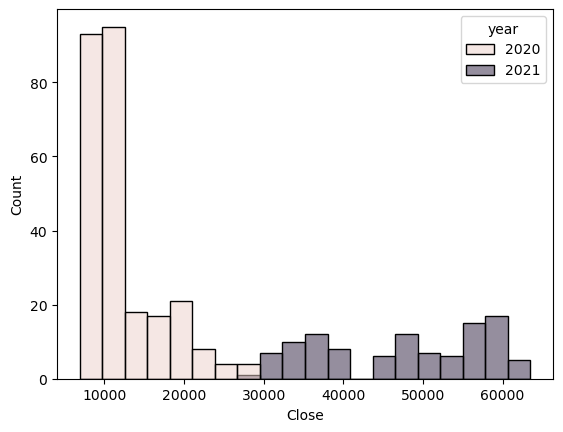

In [20]:
sns.histplot(data=data,x=data['Close'],hue=data['year'],bins=20,color='g',)



Text(0, 0.5, 'Months')

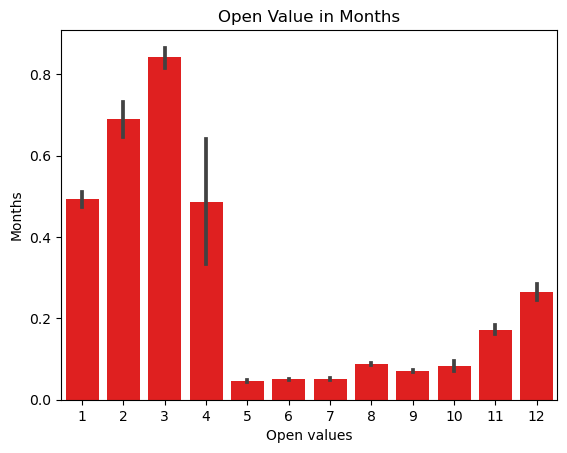

In [21]:
sns.barplot(x=data['month'],y=data['Open'],label="Total", color="r")
plt.title('Open Value in Months')
plt.xlabel('Open values')
plt.ylabel('Months')


<Axes: >

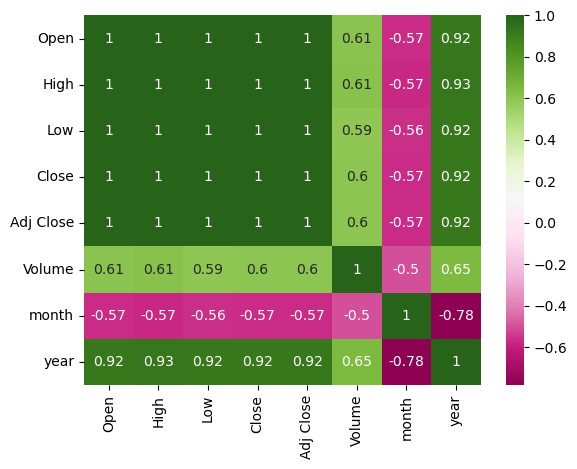

In [22]:
sns.heatmap(data.corr(),annot=True,cmap='PiYG')

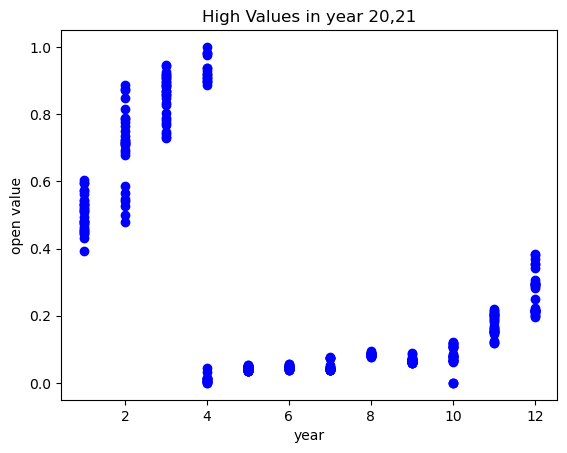

In [23]:
plt.scatter(data['month'],data['High'],color='b')
plt.title('High Values in year 20,21')
plt.xlabel('year')
plt.ylabel('open value')
plt.show()

# Splitting x and y

In [24]:
x=data.drop('Close',axis=1)
y=data['Close']



In [25]:
x

,Open,High,Low,Adj Close,Volume,month,year
0,0.000000,0.003451,0.000000,0.004176,0.101946,4,2020
1,0.000000,0.000000,0.000000,0.000000,0.000000,4,2020
2,0.007943,0.005790,0.009590,0.006664,0.059621,4,2020
3,0.010908,0.005972,0.010989,0.005459,0.056267,4,2020
4,0.009606,0.005278,0.005031,0.000029,0.075268,4,2020
...,...,...,...,...,...,...,...
361,0.941146,0.937681,0.952939,0.936245,0.116842,4,2021
362,0.936119,0.980652,0.957972,1.000000,0.170441,4,2021
363,1.000000,1.000000,0.988246,0.993046,0.192490,4,2021
364,0.992114,0.982022,1.000000,0.996654,0.143784,4,2021


In [26]:
y

0       7116.804199
1       6880.323242
2       7257.665039
3       7189.424805
4       6881.958496
           ...     
361    59893.453125
362    63503.457031
363    63109.695313
364    63314.011719
365    60694.136719
Name: Close, Length: 366, dtype: float64

# Model Selection

# Linear Regression

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=45,test_size=0.2)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(292, 7) (292,) (74, 7) (74,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
Model=LinearRegression()
Model.fit(xtrain,ytrain)
p=Model.predict(xtest)
q=r2_score(ytest,p)*100
q


100.0

In [29]:
p1=Model.predict(xtrain)                    #Generalized accquarcy
q1=r2_score(ytrain,p1)*100
q1

100.0

# Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
Model1=DecisionTreeRegressor()
Model1.fit(xtrain,ytrain)
p=Model1.predict(xtest)
q=r2_score(ytest,p)*100
q

99.96188019596457

In [31]:
p1=Model1.predict(xtrain)
q1=r2_score(ytrain,p1)*100
q1

100.0

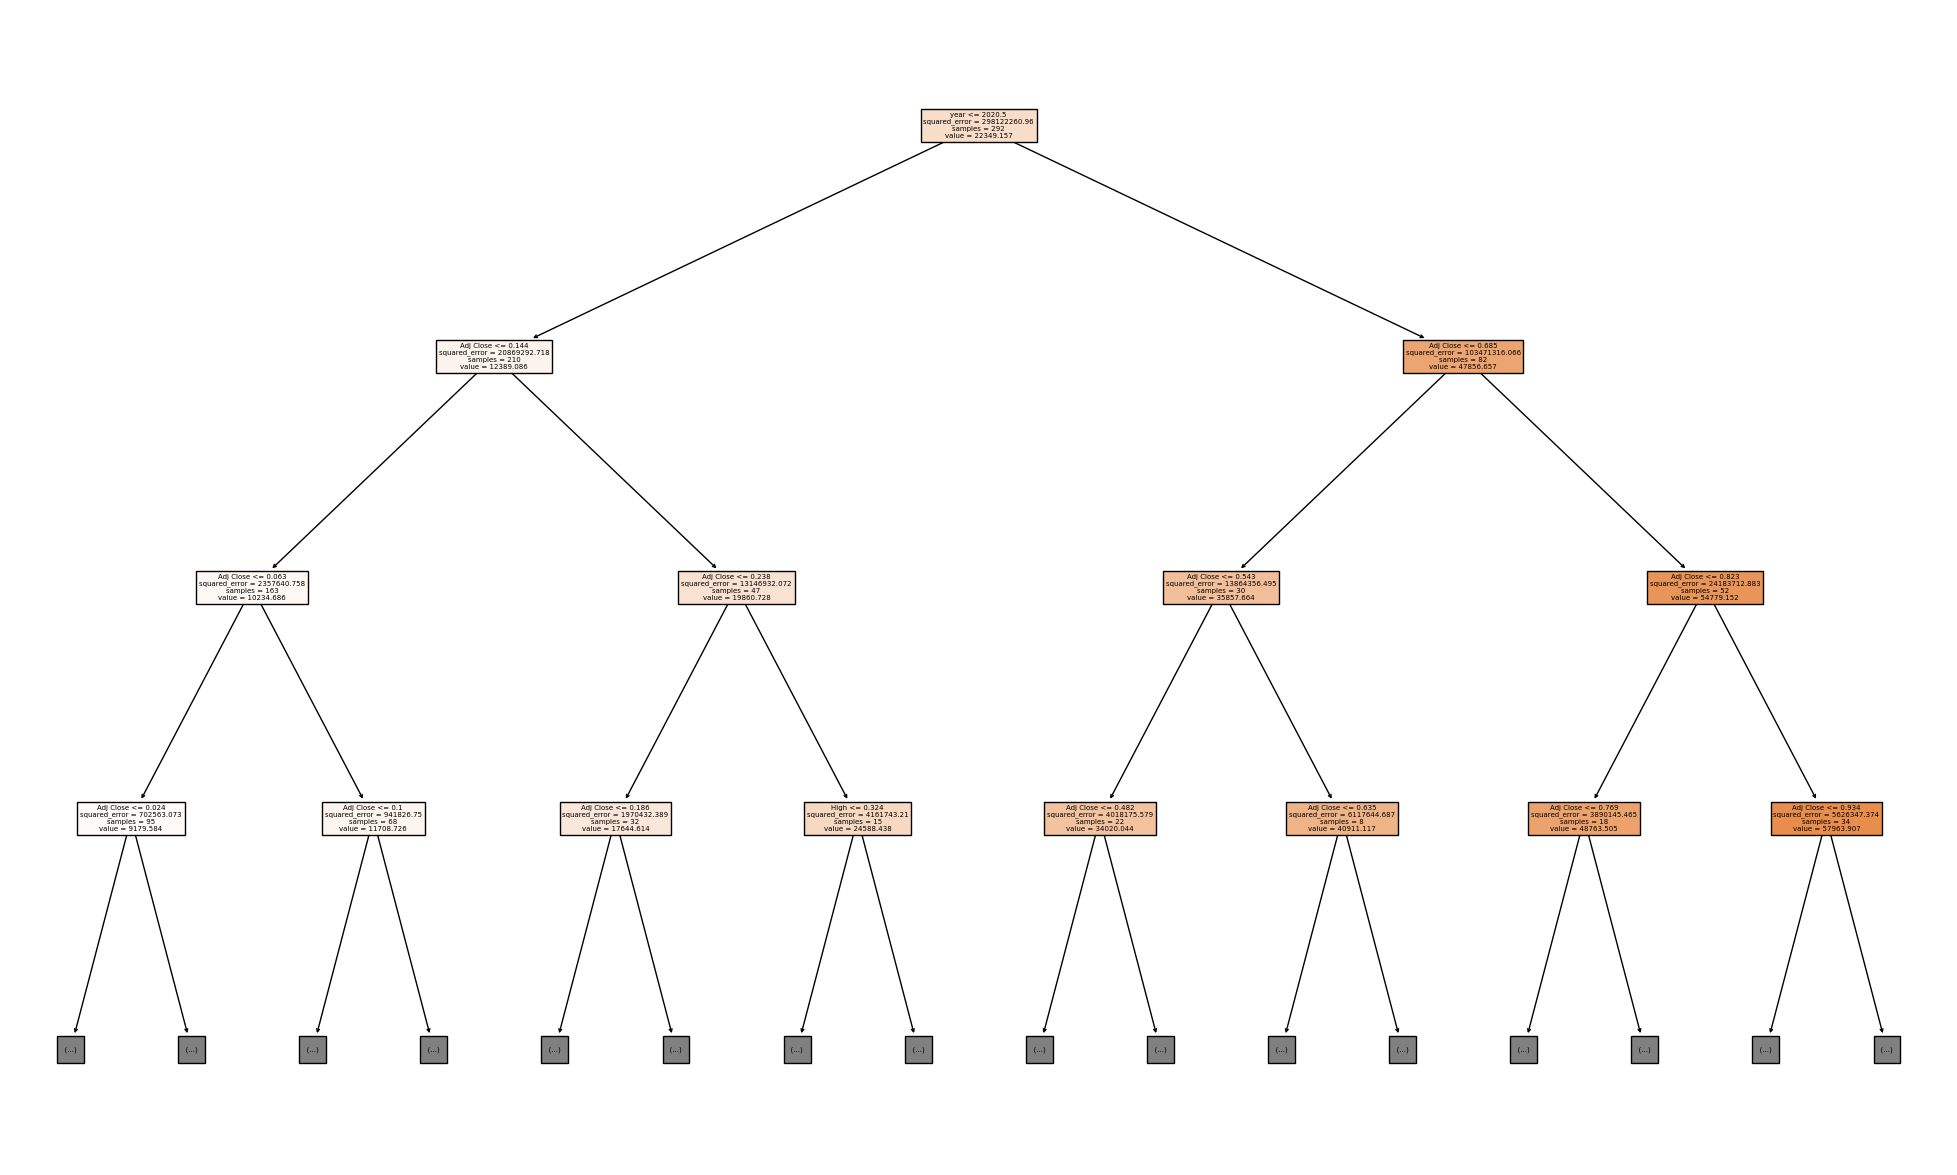

In [32]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Model1,feature_names=x.columns,filled=True,max_depth=3)
plt.show()

# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
Model2=RandomForestRegressor()
Model2.fit(xtrain,ytrain)
p=Model2.predict(xtest)
q=r2_score(ytest,p)*100
q

99.97769257434105

In [34]:
p1=Model2.predict(xtrain)
q1=r2_score(ytrain,p1)*100
q1

99.99080140867972

#  Final Prediction 

In [35]:
Values=[[1.000000,1.000000,0.988246,0.993046,0.192490,4,2021]]
Prediction=Model.predict(Values)
print('Bitcoin closing price will be',round(Prediction[0],2),'INR')

Bitcoin closing price will be 63109.7 INR
